# تحلیل ترک شغل کارکنان (Employee Attrition)

In [1]:
# import piplite
# await piplite.install("seaborn")

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 📥 بارگذاری داده‌ها

In [3]:
df_original = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df_original.copy()
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 🔎 بررسی اولیه دیتا

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


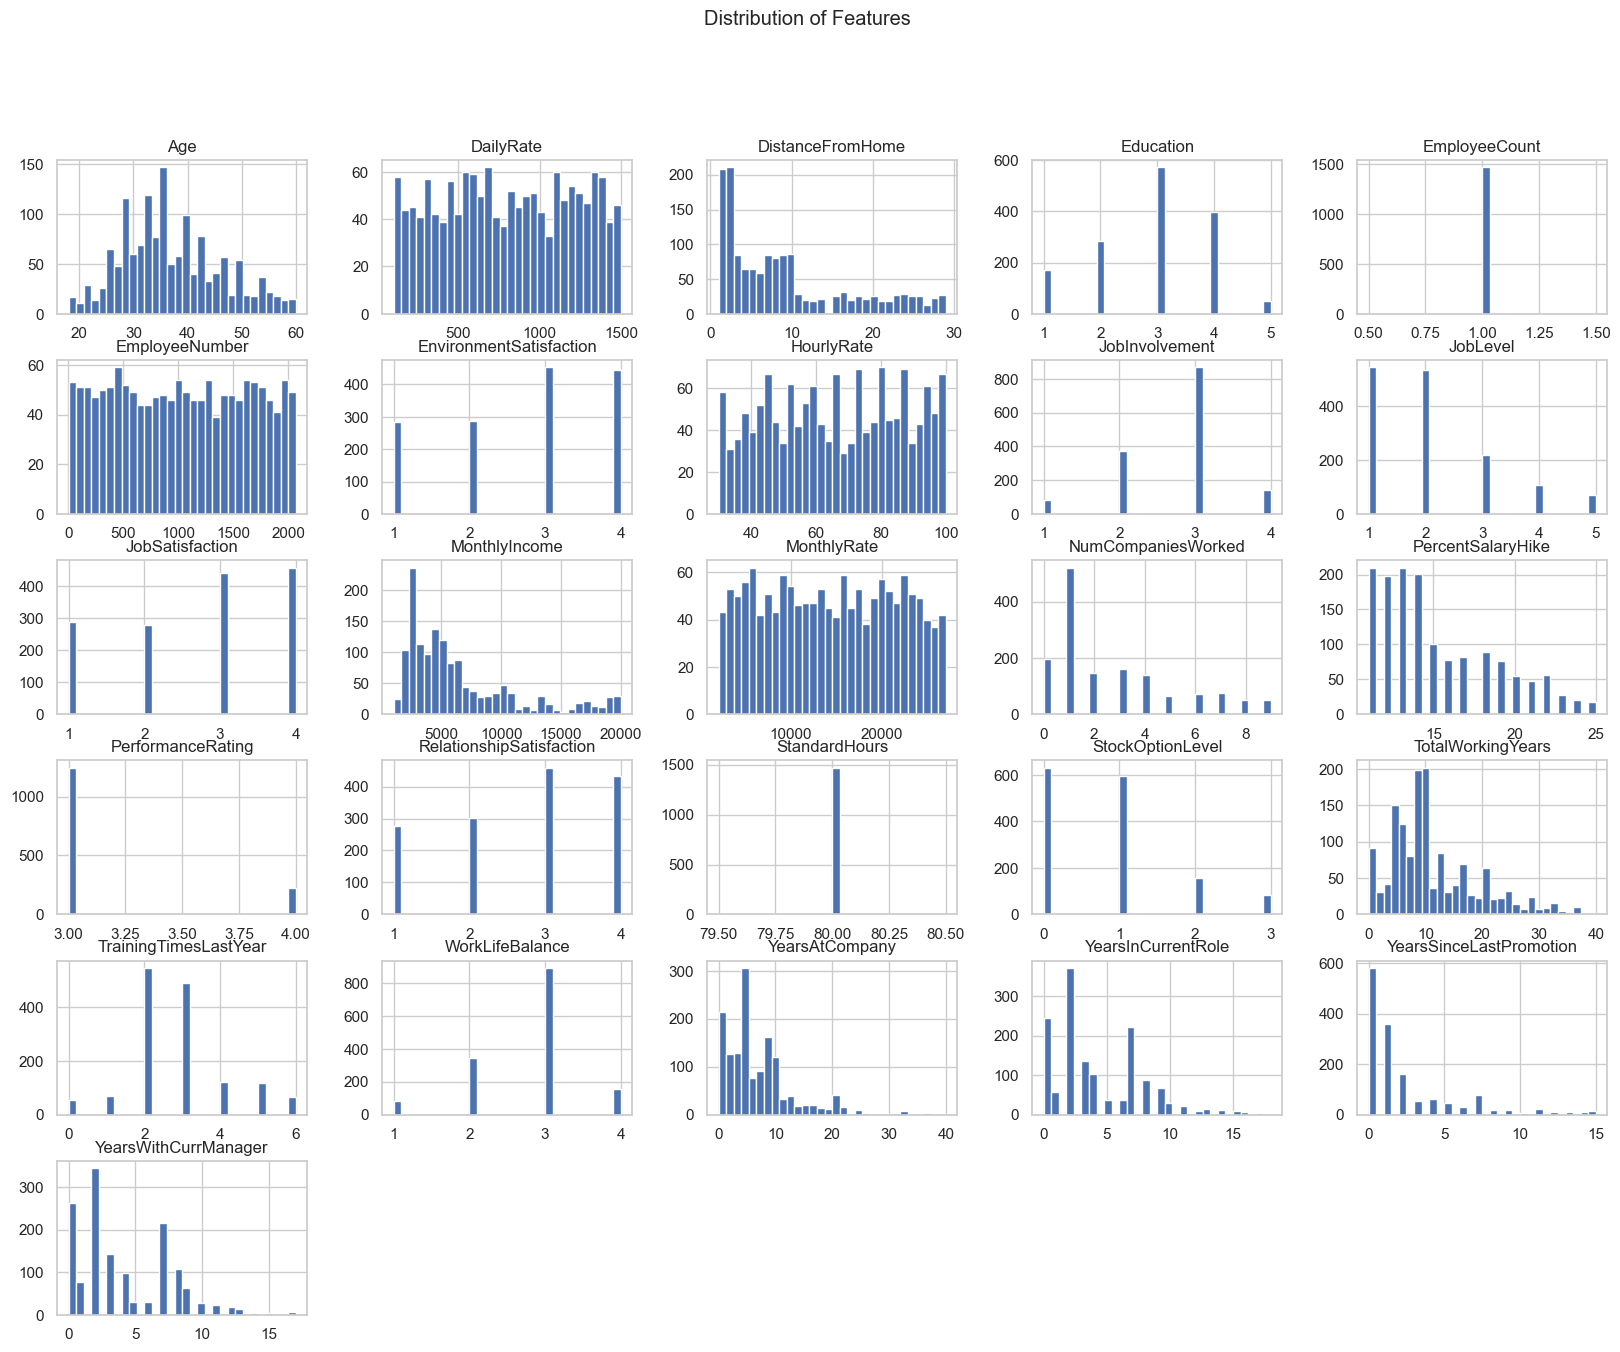

In [6]:

df.hist(bins=30, figsize=(20,15))
plt.suptitle("Distribution of Features")
plt.show()
%matplotlib notebook


## 📊 تحلیل ترند ویژگی‌ها نسبت به Attrition

<IPython.core.display.Javascript object>


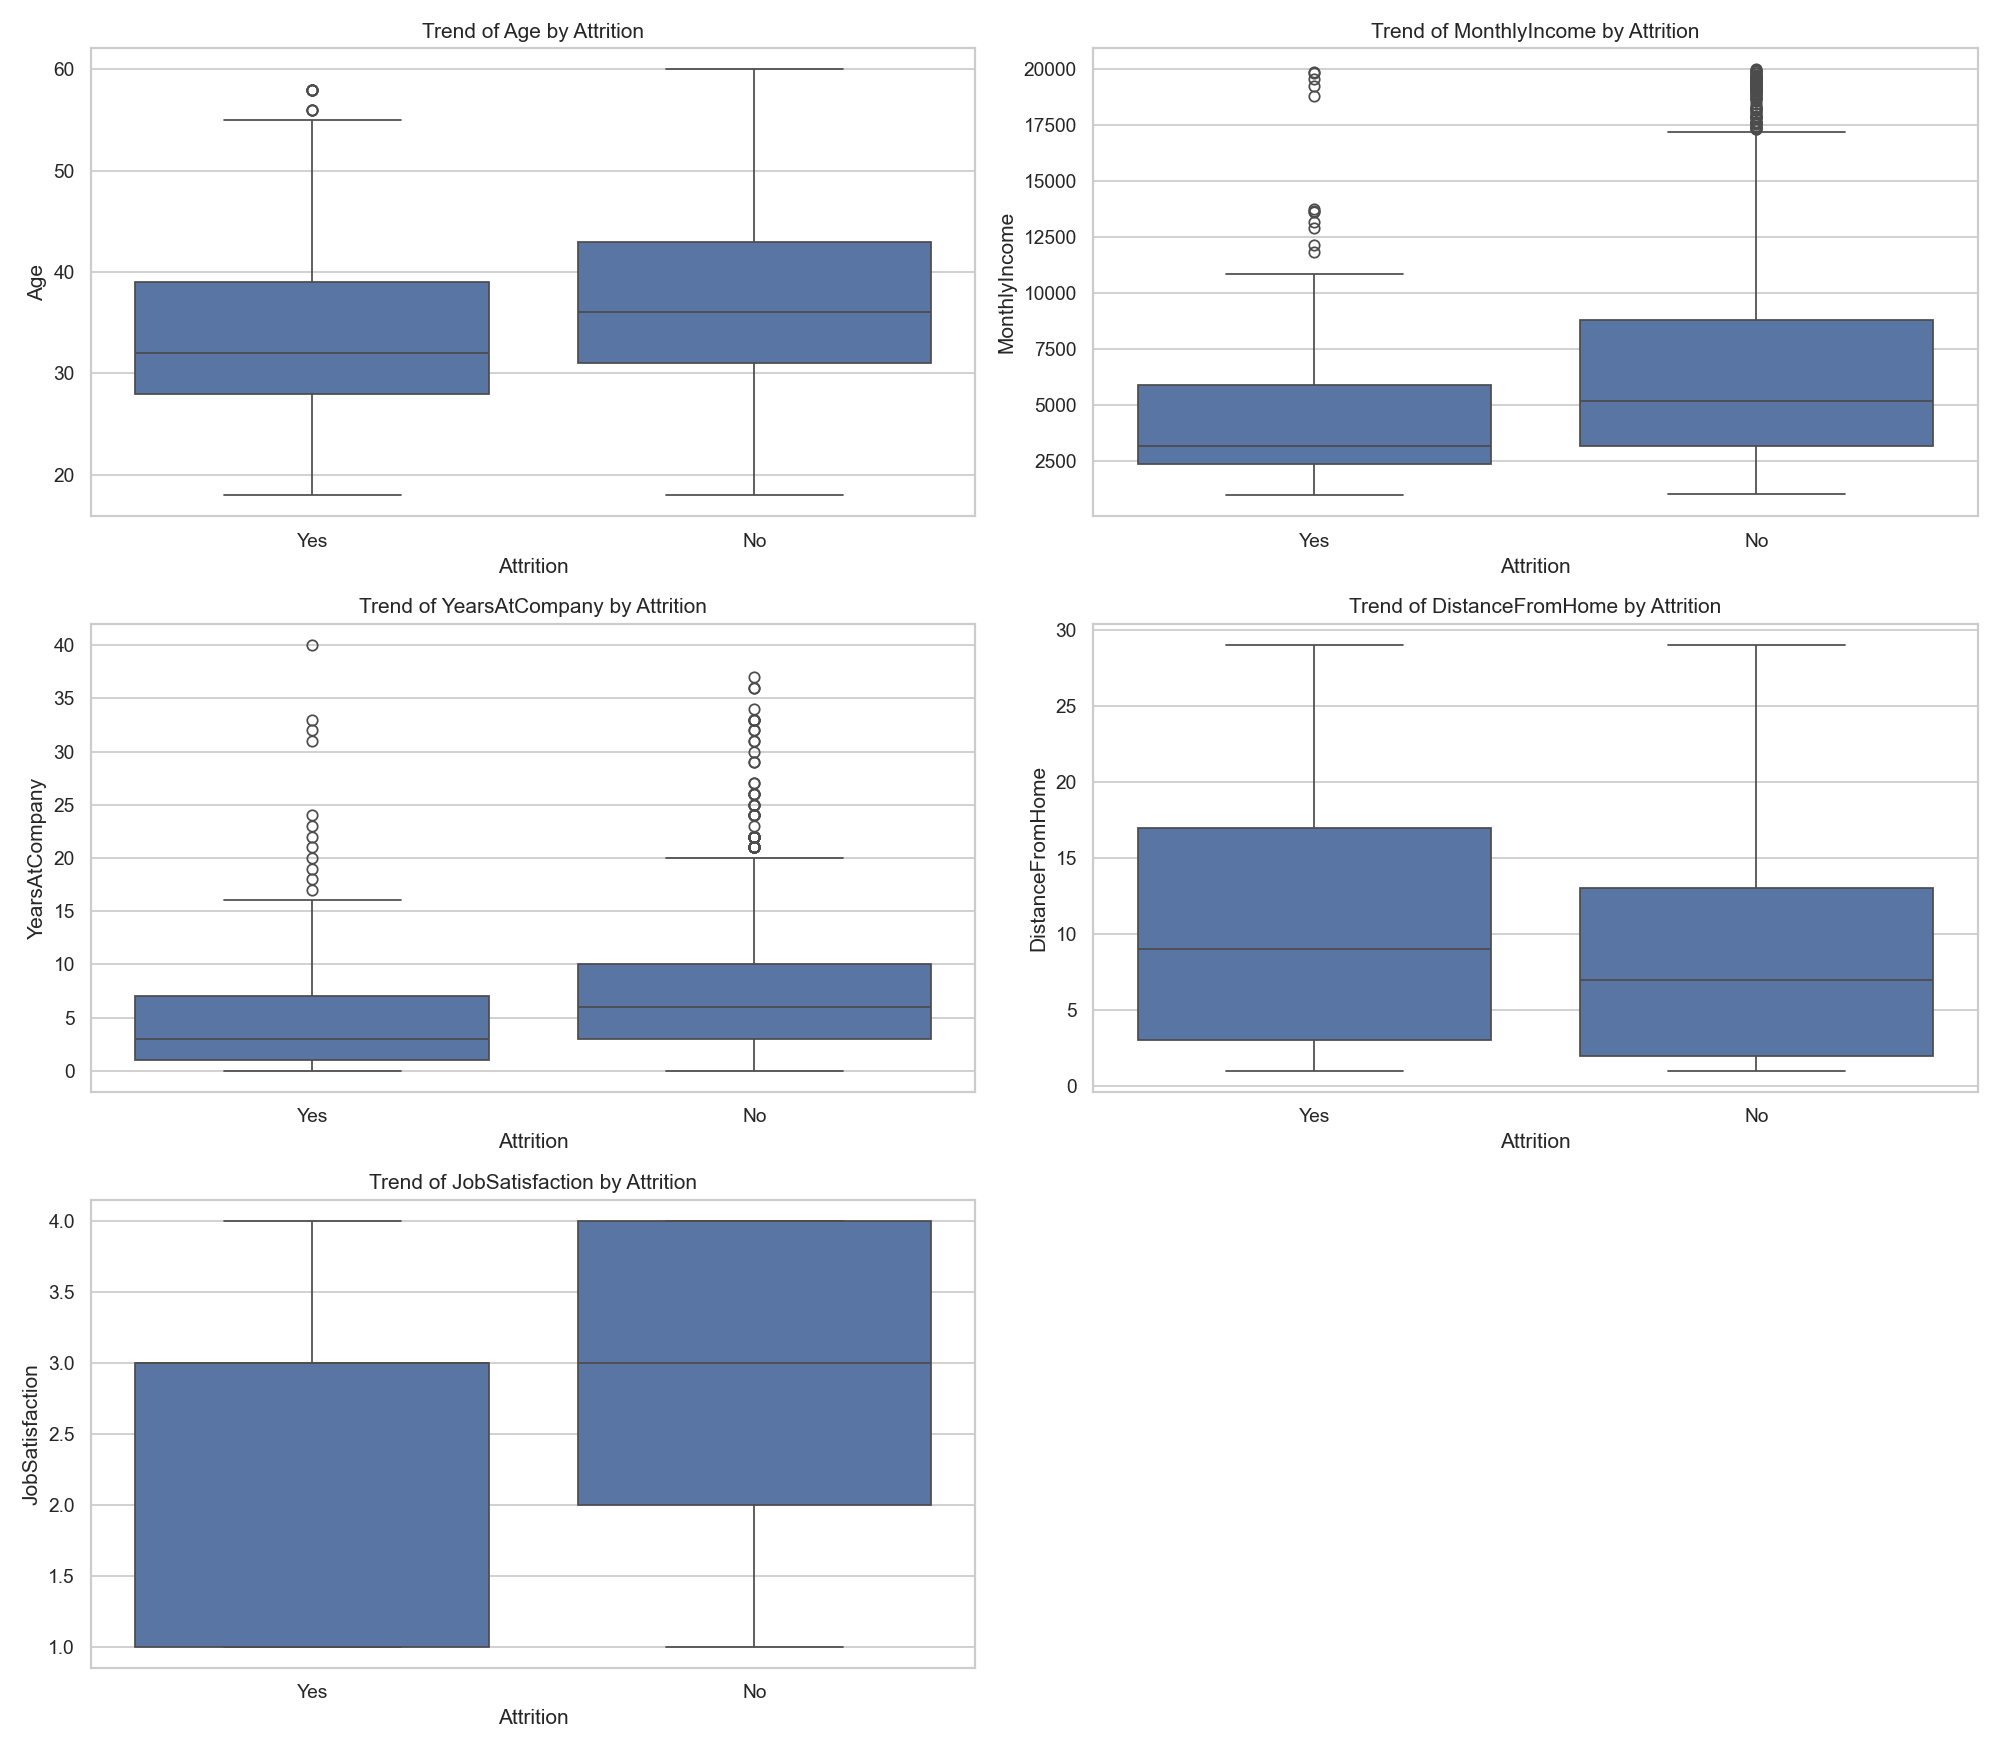

In [7]:

features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'JobSatisfaction']
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Attrition', y=feature, ax=axes[i])
    axes[i].set_title(f"Trend of {feature} by Attrition")

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


## 🔍 بررسی همبستگی ویژگی‌ها با Attrition

<IPython.core.display.Javascript object>


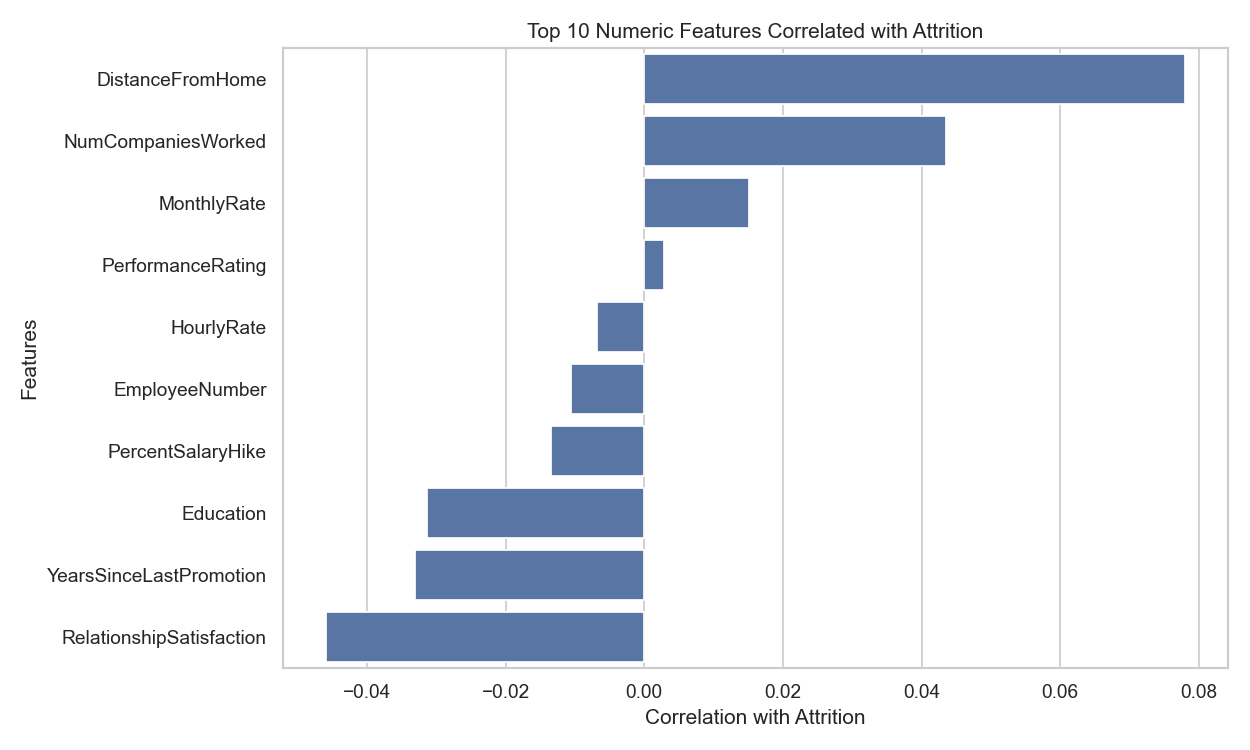

In [8]:
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_corr = df_corr.select_dtypes(include='number')
correlations = df_corr.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values[:10], y=correlations.index[:10])
plt.title("Top 10 Numeric Features Correlated with Attrition")
plt.xlabel("Correlation with Attrition")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## نمایش 15 ویژگی مهم اول

## ⚙️ نرمال‌سازی داده‌های عددی

In [9]:

# شناسایی ستون‌های عددی (غیر از ستون‌های بدون تنوع)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'])

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


## 🧪 تقسیم داده‌ها برای مدل‌سازی

In [10]:

X = df.drop(['Attrition'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ساخت داده مصنوعی برای کلاس اقلیت

In [11]:
# import piplite
# await piplite.install("imblearn")

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## 📈 مدل‌سازی با Logistic Regression

In [13]:
# model = LogisticRegression(class_weight='balanced', max_iter=1000)
# model.fit(X_resampled, y_resampled)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)


## 📊 ارزیابی مدل

In [14]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[253   2]
 [ 30   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.82      0.23      0.36        39

    accuracy                           0.89       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.89      0.86       294



<IPython.core.display.Javascript object>


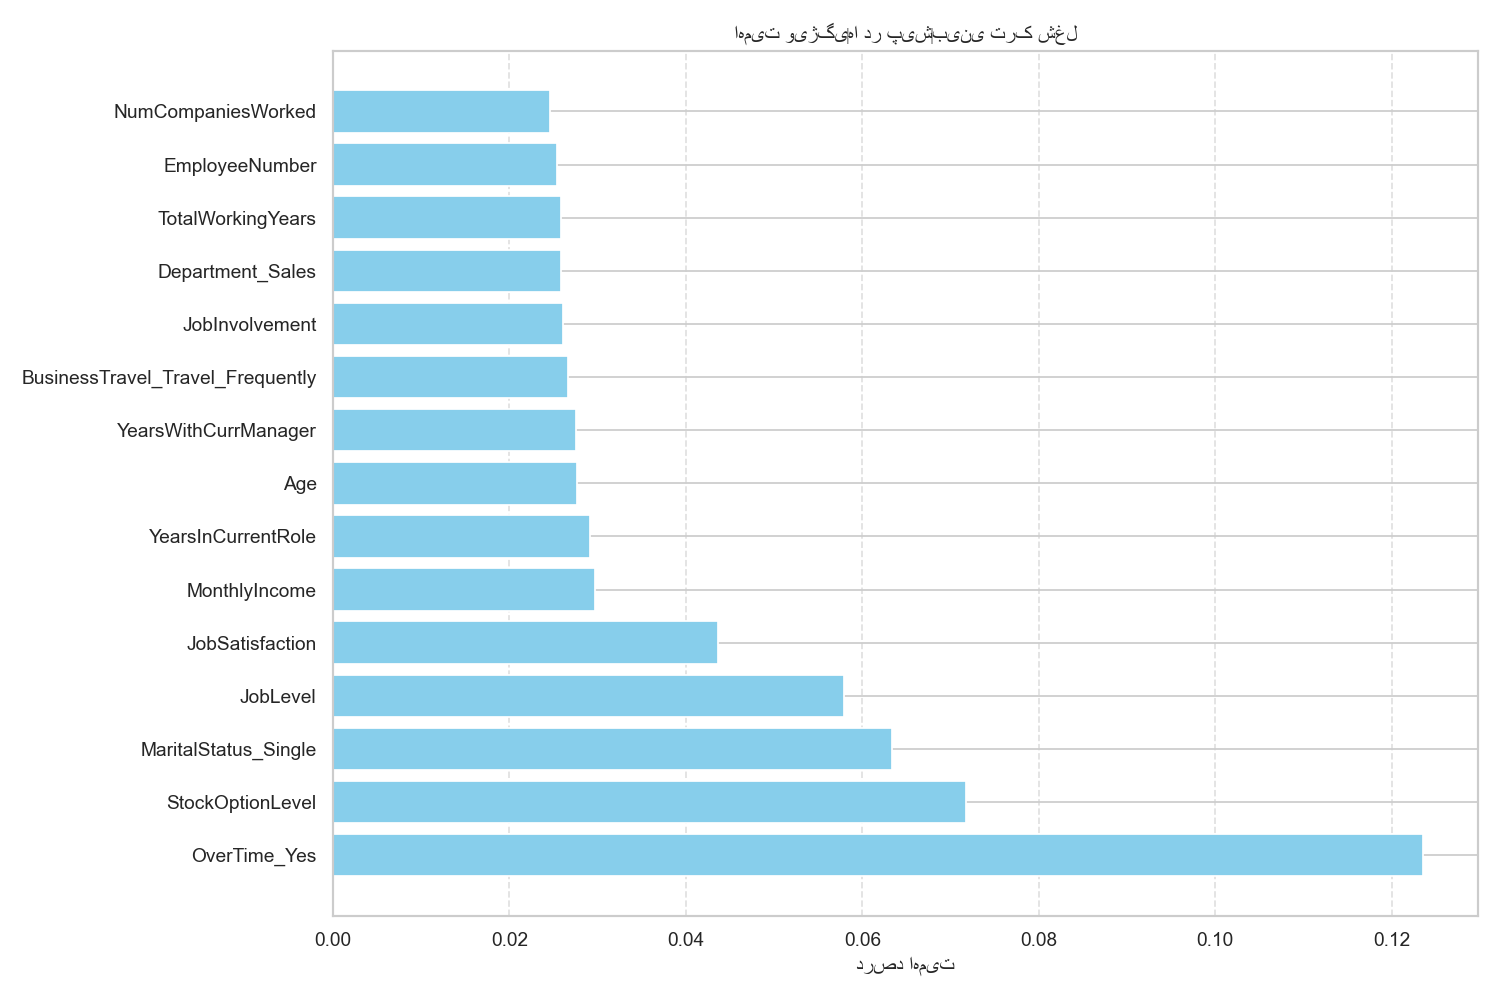

In [15]:
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
feature_names = X.columns 
importances = model.feature_importances_  
indices = np.argsort(importances)
# محاسبه همبستگی
df_corr = df_corr.select_dtypes(include='number')
correlations = df_corr.corr()['Attrition'].drop('Attrition')

# حذف مقادیر NaN و صفر
correlations = correlations.dropna()
correlations = correlations[correlations != 0]

# بررسی وجود داده
if correlations.empty:
    print("❗ هیچ همبستگی قابل توجهی یافت نشد.")
else:
    top_features = correlations.reindex(correlations.abs().sort_values(ascending=False).index)[:10]

    # رسم نمودار
plt.figure(figsize=(12, 8))
plt.title("اهمیت ویژگی‌ها در پیش‌بینی ترک شغل")
plt.barh(range(15), importances[indices[-15:]], align='center', color='skyblue')
plt.yticks(range(15), [feature_names[i] for i in indices[-15:]])
plt.xlabel("درصد اهمیت")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 🧠 تابع پیش‌بینی برای کارمند خاص

In [16]:


def predict_attrition(employee_id):
    if employee_id not in df.index:
        return f"کارمند با ID {employee_id} وجود ندارد."


    row = df.loc[[employee_id]].copy()
    row_X = row.drop(['Attrition'], axis=1)
    row_X = pd.get_dummies(row_X, drop_first=True)
    row_X = row_X.reindex(columns=X.columns, fill_value=0)  

    prob = model.predict_proba(row_X)[0][1]
    prediction = "ممکن است ترک کند" if prob > 0.5 else "احتمال ترک کم است"

    return f"احتمال ترک کار برای کارمند {employee_id}: {prob:.2%} → {prediction}"


In [17]:
left_ids = df[df['Attrition'] == 'Yes'].index.tolist()
print("کارمندانی که ترک کرده‌اند:", left_ids[:10])

کارمندانی که ترک کرده‌اند: [0, 2, 14, 21, 24, 26, 33, 34, 36, 42]


# تعداد کارکنان در ریسک بالا

In [18]:

probs = model.predict_proba(X)[:,1]
df['RiskProbability'] = probs
high_risk = df[df['RiskProbability'] > 0.6]
len(high_risk)

201

In [19]:
print(predict_attrition(0))


احتمال ترک کار برای کارمند 0: 23.00% → احتمال ترک کم است


## بیشترین ارتباط با فیچر با نمودار حرارتی

<IPython.core.display.Javascript object>


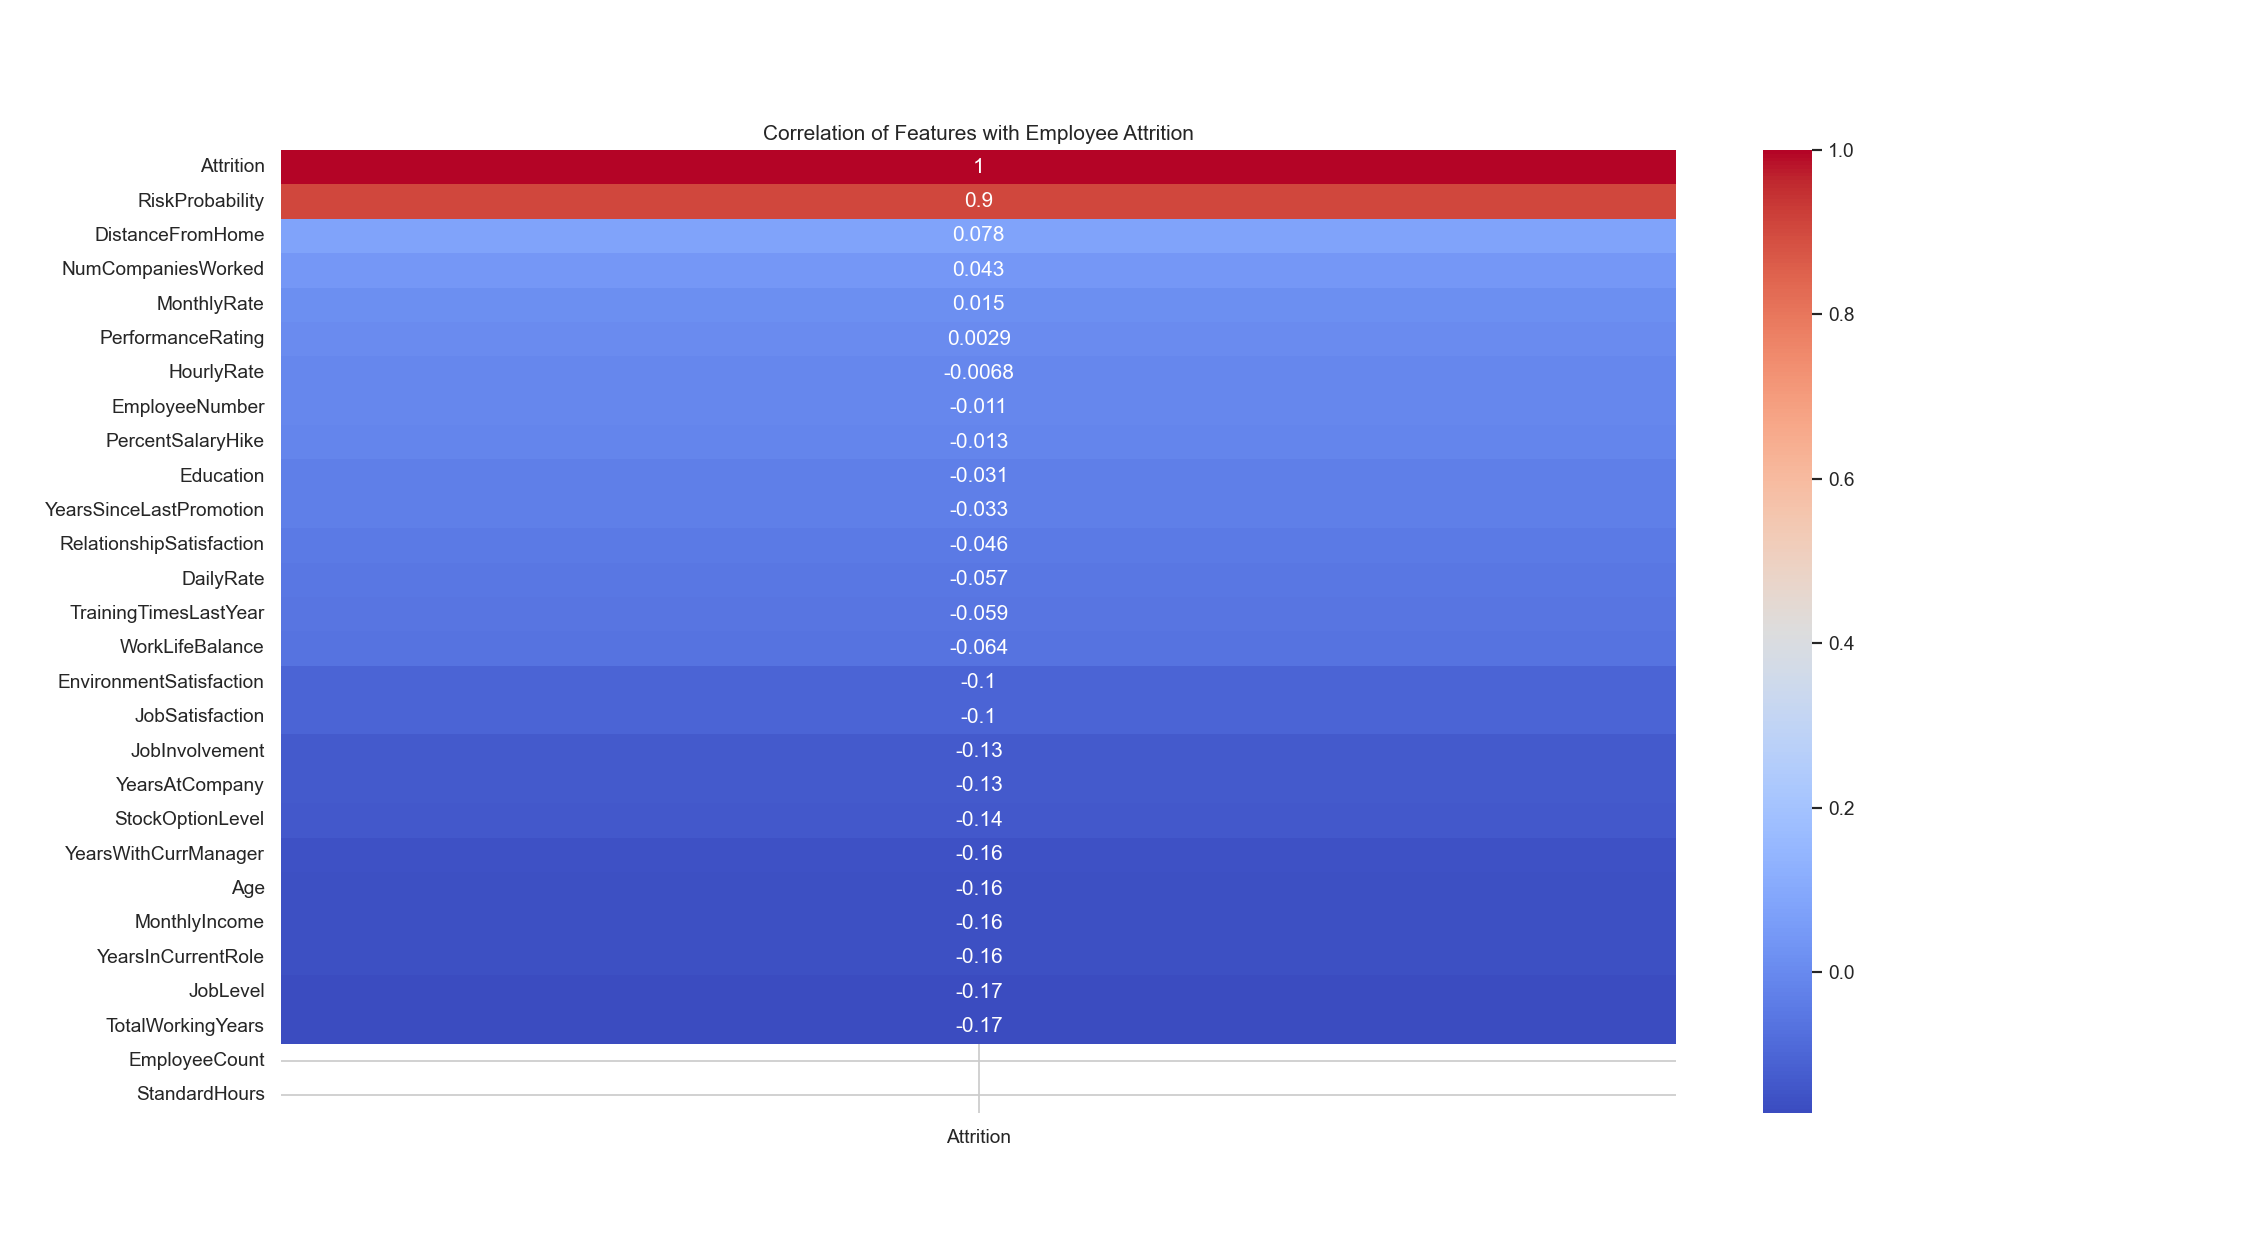

In [20]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
numeric_features = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(18, 10))
correlation = numeric_features.corr()
sns.heatmap(correlation[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Employee Attrition")
plt.show()

In [21]:
attrition_rate = df['Attrition'].mean() * 100
print(predict_attrition(42))

احتمال ترک کار برای کارمند 42: 51.00% → ممکن است ترک کند


## نرخ ترک بر اساس دپارتمان

In [22]:
df_depart = df_original.copy()

df_depart['Attrition'] = df_depart['Attrition'].map({'Yes': 1, 'No': 0})

df_depart_rate = df_depart.groupby('Department')['Attrition'].mean()

df_depart_rate


Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

# میانگین درآمد افراد ترک کرده

In [23]:
df_temp = df_original.copy()
df_temp['Attrition'] = df_temp['Attrition'].map({'Yes':1,'No':0})

df_att_mean = df_temp[df_temp['Attrition']==1]['MonthlyIncome'].mean()
df_att_mean

4787.0928270042195

## نتایج نشان می‌دهد کارکنانی که سازمان را ترک کرده‌اند به طور میانگین سطح درآمدی پایین‌تری نسبت به میانگین کل سازمان داشته‌اند.

In [24]:
df_original.groupby('Attrition')['MonthlyIncome'].mean()


Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

# آماده‌سازی داده مخصوص داشبورد

In [25]:
# احتمال ترک برای همه کارکنان
probs = model.predict_proba(X)[:,1]

df_dashboard = df_original.copy()
df_dashboard['RiskProbability'] = probs
df_dashboard['HighRisk'] = df_dashboard['RiskProbability'] > 0.6

# نرخ ترک واقعی
df_dashboard['AttritionBinary'] = df_dashboard['Attrition'].map({'Yes':1,'No':0})

attrition_rate = df_dashboard['AttritionBinary'].mean() * 100

# تعداد پرریسک
high_risk_count = df_dashboard['HighRisk'].sum()
high_risk_percent = (high_risk_count / len(df_dashboard)) * 100


# محاسبه ریسک مالی

In [26]:
cost_per_employee = 20000
financial_risk = high_risk_count * cost_per_employee